In [1]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


# kernel = linear

In [2]:
df_NP15=pd.read_excel('cleansing_data_californai_NP15.xlsx')

x=np.array([[1,2,3,4]])
y=np.array([[1]])

for x1, x2, x3, x4, y1 in zip(list(df_NP15['Carbon price']), 
                             list(df_NP15['Wtd avg price $/MMBtu']), 
                             list(df_NP15['Daily volume MWh']),
                             list(df_NP15['Daily volume MMBtu']), 
                             list(df_NP15['Average NP15 Elec price $/MWh'])):
    
    x=np.append(x, [[x1, x2, x3/1000, x4/1000]], axis=0)
    y=np.append(y, [[y1]], axis=0)
x=np.delete(x,0,0)
y=np.delete(y,0,0)
y.shape = (len(y))



In [ ]:

# clf = SVR(gamma=0.1, C=10, epsilon=0.2)
clf = SVR(kernel='linear')
clf.fit(x, y) 
result=clf.predict(x)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y)
ax.plot(result)
plt.show()



## kFold cross validation

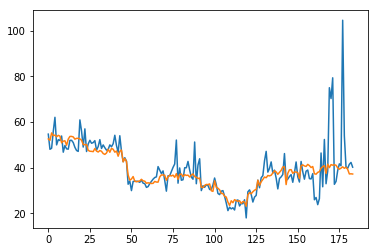

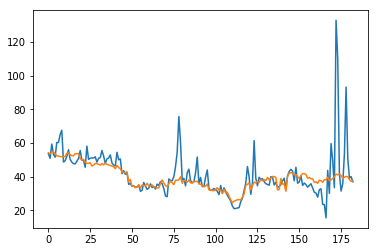

In [23]:
kf = KFold(n_splits=2, shuffle=True)
kf.get_n_splits(x)

for train_index, test_index in kf.split(x):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
#     clf = SVR(gamma=0.1, C=10, epsilon=0.002)
clf = SVR(kernel='linear')

clf.fit(x_train, y_train) 
result=clf.predict(x_train)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y_train)
ax.plot(result)
plt.show()    

# print('train score:', clf.score(result, y_train))
result=clf.predict(x_test)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y_test)
ax.plot(result)
plt.show()
# print('test score:', clf.score(result, y_test))



[51.94844525 53.65070816 53.60990516 53.11163321 51.98211144 51.80159056
 49.71148607 53.52099783 52.58734904 52.0329465  52.10689708 53.24101598
 53.25385762 53.33704055 52.28895606 51.53781193 49.8496934  50.03959273
 48.36356286 47.19577132 48.03325702 46.8290695  48.58213814 46.22756349
 46.82352307 47.40171108 46.32305383 47.54704285 47.52840209 46.44774539
 46.75126972 47.72819672 46.83463571 46.20124235 44.48017317 46.80086109
 45.28933255 42.78750683 42.59990192 43.69109783 42.70974489 42.29591612
 36.23744261 37.77033778 36.52365507 34.12021276 33.0354959  34.25355276
 35.77076733 34.67842792 34.0463639  34.26583811 34.67337011 34.70311863
 34.31744735 34.34148674 34.34019694 33.29158138 33.03504884 33.12177406
 33.22489564 33.14472415 34.08574206 33.54857193 35.64062368 35.72286843
 36.49841054 37.68796053 34.62475914 33.92612528 35.84893214 36.4439124
 37.70374475 36.52721244 36.21405345 38.5546847  37.86004266 38.38665457
 35.72413334 37.77491692 36.87365561 37.01519164 36.

ValueError: Expected 2D array, got 1D array instead:
array=[51.94844525 53.65070816 53.60990516 53.11163321 51.98211144 51.80159056
 49.71148607 53.52099783 52.58734904 52.0329465  52.10689708 53.24101598
 53.25385762 53.33704055 52.28895606 51.53781193 49.8496934  50.03959273
 48.36356286 47.19577132 48.03325702 46.8290695  48.58213814 46.22756349
 46.82352307 47.40171108 46.32305383 47.54704285 47.52840209 46.44774539
 46.75126972 47.72819672 46.83463571 46.20124235 44.48017317 46.80086109
 45.28933255 42.78750683 42.59990192 43.69109783 42.70974489 42.29591612
 36.23744261 37.77033778 36.52365507 34.12021276 33.0354959  34.25355276
 35.77076733 34.67842792 34.0463639  34.26583811 34.67337011 34.70311863
 34.31744735 34.34148674 34.34019694 33.29158138 33.03504884 33.12177406
 33.22489564 33.14472415 34.08574206 33.54857193 35.64062368 35.72286843
 36.49841054 37.68796053 34.62475914 33.92612528 35.84893214 36.4439124
 37.70374475 36.52721244 36.21405345 38.5546847  37.86004266 38.38665457
 35.72413334 37.77491692 36.87365561 37.01519164 36.01271564 35.97831542
 36.93467375 36.65133406 36.74940736 37.71241631 37.40186621 35.52631939
 35.4875842  34.94962862 34.54356612 33.66036002 35.35305978 32.62512191
 33.0788804  31.72254691 31.97356904 29.85984305 29.62668883 34.07461236
 31.19845111 29.86737941 27.2541312  26.00705964 23.87037709 25.96309623
 25.84766862 24.98235886 26.56928487 26.22748039 24.94934781 27.41814091
 26.75503998 29.61034157 29.62744706 34.4183142  32.25506073 36.11476786
 33.62314919 34.33238398 36.82012429 36.11417722 36.54687639 37.58153247
 38.21462177 37.58593309 36.84600149 37.12540331 38.12085442 37.23667187
 37.4217718  38.13251414 37.50551659 39.72799083 39.83480655 38.96104248
 32.72364649 38.57072351 38.22067449 35.0376911  38.03289153 34.80408938
 30.99515497 39.55416462 41.66463277 38.98437744 40.27183326 39.29186325
 39.14748828 39.93058638 39.33080768 38.59997124 38.98526073 35.2445809
 35.67188136 34.72523725 36.50805056 36.16496714 35.37901462 36.64125374
 36.45832534 37.97797213 37.87886919 38.68718612 35.73205678 38.40369996
 37.24999987 38.05546655 37.99219181 38.21599431 38.13531624 36.43991817
 36.96816819 35.99740139 36.54595519 37.4507344  37.04413169 35.3497613
 34.65419034 34.75749226 34.77977362 34.8270788 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# kernel='polynomial'

In [ ]:
df_NP15=pd.read_excel('cleansing_data_californai_NP15.xlsx')

x=np.array([[1,2,3,4]])
y=np.array([[1]])

for x1, x2, x3, x4, y1 in zip(list(df_NP15['Carbon price']), 
                             list(df_NP15['Wtd avg price $/MMBtu']), 
                             list(df_NP15['Daily volume MWh']),
                             list(df_NP15['Daily volume MMBtu']), 
                             list(df_NP15['Average NP15 Elec price $/MWh'])):

    x=np.append(x, [[x1, x2, x3, x4]], axis=0)
    y=np.append(y, [[y1]], axis=0)
x=np.delete(x,0,0)
y=np.delete(y,0,0)
y.shape = (len(y))

# clf = SVR(gamma=0.1, C=10, epsilon=0.2)
clf = SVR(kernel='poly')
clf.fit(x, y) 

result=clf.predict(x)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y)
ax.plot(result)
plt.show()






## kFold crossvalidation

In [ ]:
kf = KFold(n_splits=4, shuffle=True)
kf.get_n_splits(x)

for train_index, test_index in kf.split(x):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
#     clf = SVR(gamma=0.1, C=10, epsilon=0.002)
clf = SVR(kernel='poly')
clf.fit(x_train, y_train) 
result=clf.predict(x_train)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y_train)
ax.plot(result)
plt.show()
# print('test score:', clf.score(result, y_train))


result=clf.predict(x_test)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y_test)
ax.plot(result)
plt.show()
# print('test score:', clf.score(result, y_test))
    

In [50]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

print(kf)  
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("Train data", X_train, "Target data", y_train)

KFold(n_splits=2, random_state=None, shuffle=False)
Train data [[5 6]
 [7 8]] Target data [3 4]
Train data [[1 2]
 [3 4]] Target data [1 2]


array([[1, 2],
       [3, 4]])

In [103]:
df=pd.DataFrame()
df['Average NP15 Elec price $/MWh']=df_NP15['Average NP15 Elec price $/MWh']
df['Carbon price']=df_NP15['Carbon price']
df['Wtd avg price $/MMBtu']=df_NP15['Wtd avg price $/MMBtu']
df['Daily volume MWh']=df_NP15['Daily volume MWh']
df['Daily volume MMBtu']=df_NP15['Daily volume MMBtu']
corr = df.corr()

In [104]:
corr

,Average NP15 Elec price $/MWh,Carbon price,Wtd avg price $/MMBtu,Daily volume MWh,Daily volume MMBtu
Average NP15 Elec price $/MWh,1.000000,-0.030042,0.607122,0.091300,0.015502
Carbon price,-0.030042,1.000000,-0.463541,-0.142143,-0.134785
Wtd avg price $/MMBtu,0.607122,-0.463541,1.000000,-0.029718,-0.029503
Daily volume MWh,0.091300,-0.142143,-0.029718,1.000000,-0.039794
Daily volume MMBtu,0.015502,-0.134785,-0.029503,-0.039794,1.000000


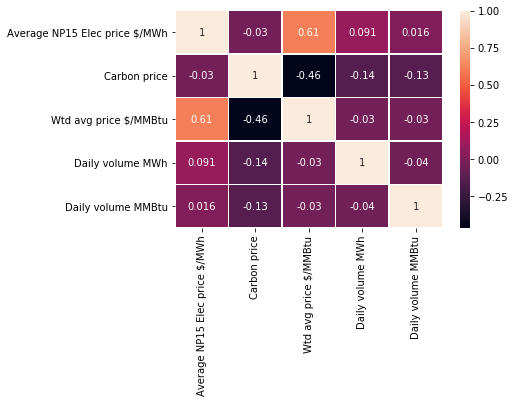

In [107]:
ax = sns.heatmap(corr, linewidth=0.5, annot=True)
plt.show()


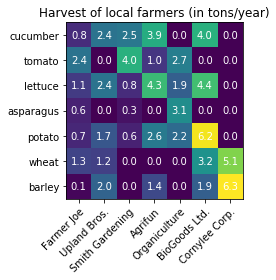

In [151]:
# sphinx_gallery_thumbnail_number = 2

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()